<a href="https://colab.research.google.com/github/FabioLofredo/Exercises-for-Data-Science/blob/main/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Import the necessary libraries 

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

#2. Read the data as a data frame

In [ ]:
data=pd.read_csv('/content/insurance.csv')

In [ ]:
print(data.info)
print(type(data))

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>
<class 'pandas.core.frame.DataFrame'>


#3. Perform basic EDA which should include the following and print out your insights at every step. 



b. Data type of each attribute 

c. Checking the presence of missing values 

d. 5 point summary of numerical attributes 

e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns 

g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

h. Distribution of categorical columns (include children) 

i. Pair plot that includes all the columns of the data frame 


In [ ]:
#a. Shape of the data
data.shape

(1338, 7)

In [ ]:
#b. Data type of each attribute
print(data.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
#c. Checking the presence of missing values
print(data.isna().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [ ]:
#d. 5 point summary of numerical attributes
print(data.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


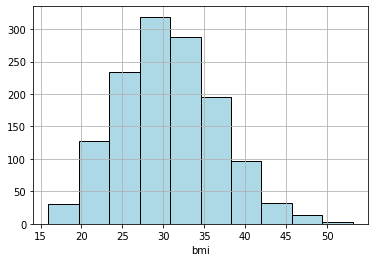

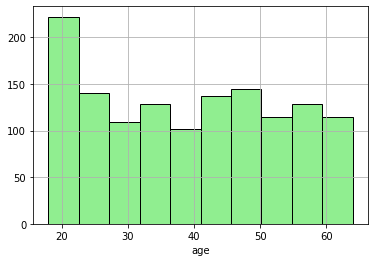

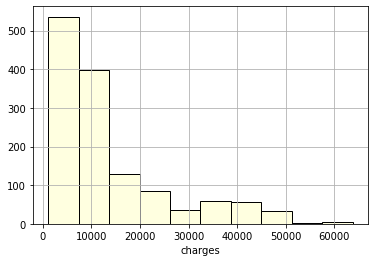

In [ ]:
#e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.
data["bmi"].hist(color='lightblue',edgecolor = 'black')
plt.xlabel('bmi')
plt.show()
data["age"].hist(color='lightgreen',edgecolor = 'black')
plt.xlabel('age')
plt.show()
data["charges"].hist(color='lightyellow',edgecolor = 'black')
plt.xlabel('charges')
plt.show()

In [ ]:
#f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns
print(data["bmi"].skew())
print(data["age"].skew())
print(data["charges"].skew())

0.2840471105987448
0.05567251565299186
1.5158796580240388


bmi and age are distributed, but charges are skwed.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


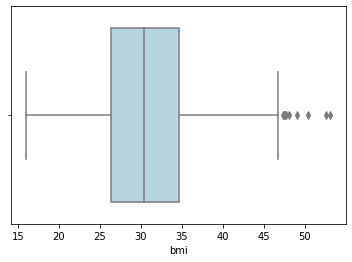

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


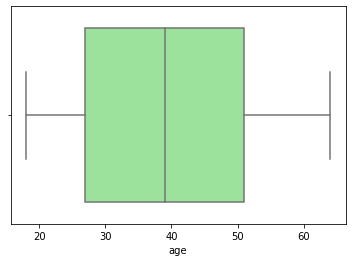

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


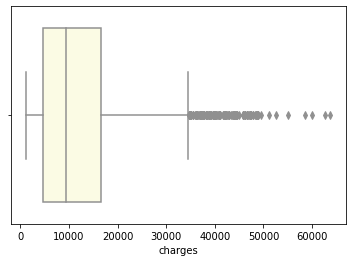

In [ ]:
#g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns
sns.boxplot(data["bmi"],color='lightblue')
plt.show()
sns.boxplot(data["age"],color='lightgreen')
plt.show()
sns.boxplot(data["charges"],color='lightyellow')
plt.show()

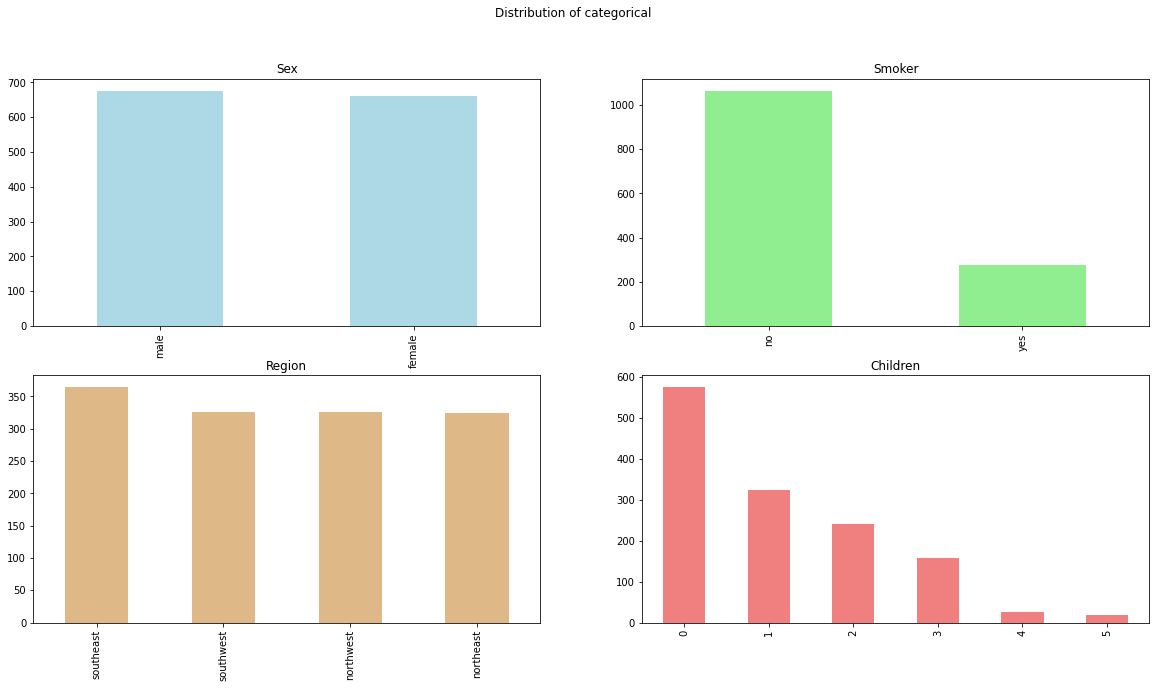

In [ ]:
#h. Distribution of categorical columns (include children)
plt.figure(figsize=(20, 10))

plt.subplot(221)
plt.title('Sex')
data["sex"].value_counts().plot( kind="bar", color='lightblue')

plt.subplot(222)
plt.title('Smoker')
data["smoker"].value_counts().plot( kind="bar", color='lightgreen')

plt.subplot(223)
plt.title('Region')
data["region"].value_counts().plot( kind="bar", color='burlywood')

plt.subplot(224)
plt.title('Children')
data["children"].value_counts().plot( kind="bar", color='lightcoral')

plt.suptitle('Distribution of categorical')  
plt.show()



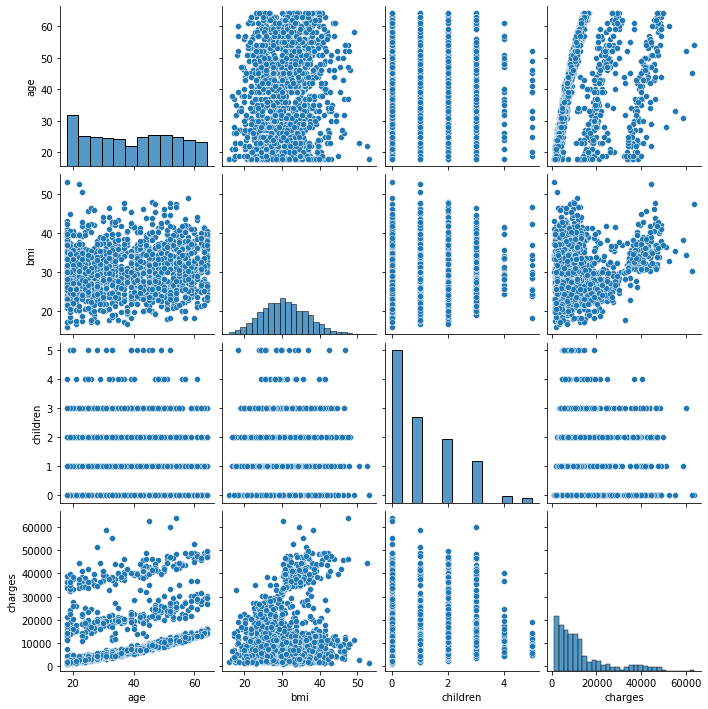

In [ ]:
 #i. Pair plot that includes all the columns of the data frame
 sns.pairplot(data)
 plt.show()

#4. Answer the following questions with statistical evidence 


In [ ]:
#a. Do charges of people who smoke differ significantly from the people who don't?

#print(data[data["smoker"]=="yes"]['charges'])
#print(data[data["smoker"]=="no"]['charges'])

t,p= stats.ttest_ind(data[data["smoker"]=="no"]['charges'],data[data["smoker"]=="yes"]['charges'])

print("Ho = hipotesis null, the charges do not differ significantly")
print("Ha = alternative hipotesis, the charges differ significantly")

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")


Ho = hipotesis null, the charges do not differ significantly
Ha = alternative hipotesis, the charges differ significantly
Ho was rejected, p= 8.271435842179102e-283


In [ ]:
#b. Does bmi of males differ significantly from that of females?

#print(data[data["sex"]=="female"]["bmi"])
#print(data[data["sex"]=="male"]["bmi"])

t,p= stats.ttest_ind(data[data["sex"]=="female"]["bmi"],data[data["sex"]=="male"]["bmi"] )

print("Ho = hipotesis null, the charges do not differ significantly")
print("Ha = alternative hipotesis, the charges differ significantly")

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, the charges do not differ significantly
Ha = alternative hipotesis, the charges differ significantly
Ho was not rejected, p= 0.08997637178984932


In [ ]:
#c. Is the proportion of smokers significantly different in different genders?

print("Ho = hipotesis null, smokers do not differ significantly from gender")
print("Ha = alternative hipotesis, smokers differ significantly from gender")

ct = pd.crosstab(data["sex"],data["smoker"])

chi2, p , dof, expected = stats.chi2_contingency(ct)

if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")

Ho = hipotesis null, smokers do not differ significantly from gender
Ha = alternative hipotesis, smokers differ significantly from gender
Ho was rejected, p= 0.006548143503580696


In [ ]:
#d. Is the distribution of bmi across women with no children, one child and two children, the same?

print("Ho = hipotesis null, the distribuiton of bmi from women is not different taking in consideration the children number")
print("Ha = alternative hipotesis, the distribuiton of bmi from women is different taking in consideration the children number")

c0 = data[(data["sex"]=="female") & (data["children"] == 0)]["bmi"]
c1 = data[(data["sex"]=="female") & (data["children"] == 1)]["bmi"]
c2 = data[(data["sex"]=="female") & (data["children"] == 2)]["bmi"]

st, p = stats.f_oneway(c0,c1,c2)


if (p>0.05):
  print(f"Ho was not rejected, p= {p}")
else:
  print(f"Ho was rejected, p= {p}")


Ho = hipotesis null, the distribuiton of bmi from women is not different taking in consideration the children number
Ha = alternative hipotesis, the distribuiton of bmi from women is different taking in consideration the children number
Ho was not rejected, p= 0.7158579926754841
